## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Loading dataset.
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#Number of rows in dataset.
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
#Number of unique users in dataset.
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
#Proportion of users converted.
df.query('converted  == 1').count().mean()

35237.0

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#Number of times new_page and treatment don't match.
df[((df['group'] == 'treatment') != (df['landing_page'] == 'new_page'))].shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
#Missing values in rows.
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Dropping rows where number of times new_page and treatment don't match.
df2 = df.drop(df[((df['group'] == 'treatment') != (df['landing_page'] == 'new_page'))].index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0.
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#Number of unique users.
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#Number of duplicated user ID.
sum(df2['user_id'].duplicated())

1

In [12]:
#Duplicated user ID.
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
#Duplicated user ID.
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#Dropping one duplicate user.
df2 = df2.drop(df2[df2.duplicated('user_id')].index)

In [15]:
#Checking duplicates.
sum(df2['user_id'].duplicated())

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
#Probability of users converting.
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
#Probability of users converted in control group.
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
#Probability of users converted in treatment group.
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
#Probability of user receiving new page.
(df2.landing_page == 'new_page').mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<ul>
<li>Above, I have calculated the probability of conversion and the group it belongs to.</li> 

<li>In (a.) The conversion rate of the users is 11.9% which can be either from old to new or old to new. </li>

<li>Then in (b.) the users who have converted in control group are 12.0%. </li>

<li>In (c.) The users who have converted in treatment group are 11.8% which is less than the control group but, with a really small rate. </li>

<li>Finally in (d.) it is concluded that there are 50% users whose landing page is new page.</li>

<li>Therefore, through this analysis we cannot provide sufficient evidence that the new treatment page is leading to more conversion rate.</li>
</ul>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$p_{old} = p_{new}$**

**$p_{old} \neq p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
#Conversion rate of p_new under null.
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
#Conversion rate of p_old under null.
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [22]:
#Computing n_new.
n_new = df2[df2.group=='treatment'].user_id.count()
n_new

145310

d. What is $n_{old}$?

In [23]:
#Computing n_old.
n_old = df2[df2.group=='control'].user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
#Simulating new_page_converted.
new_page_converted = np.random.binomial(1, p_new, n_new).mean()
new_page_converted

0.11831257311953754

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
#Simulating old_page_converted.
old_page_converted = np.random.binomial(1, p_old, n_old).mean()
old_page_converted

0.11963599818274433

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
#Calculating Observed Difference.
obs_diff = (new_page_converted) - (old_page_converted)
obs_diff

-0.00132342506320679

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
#Simulating 10,000 samples for p_diffs.
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new).mean()
    old_page_converted = np.random.binomial(1, p_old, n_old).mean()
    p_diffs.append(new_page_converted - old_page_converted)
    
p_diffs = np.array(p_diffs)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

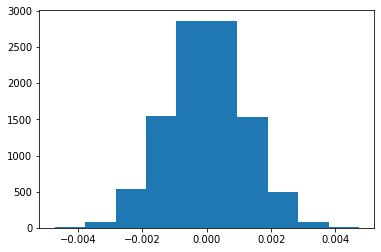

In [28]:
#Plotting histogram for p_diffs.
plt.hist(p_diffs);

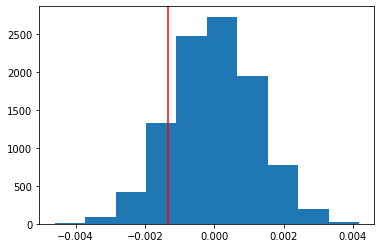

In [29]:
#Calculating and plotting Normal Distribution.
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals)
plt.axvline(obs_diff, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
#Calculating p_value
pvalue = (null_vals > obs_diff).mean()
pvalue

0.8631

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<ul>
<li> I have computed the P-Value from the normal distribution and the Observed Difference, I have calculated the norma distribution <b>np.random.normal</b> using the standard deviation of the simulation and the size of the dataset with 10000 iterations.</li>
    
<li> The value I have received is<b> 0.9</b> which is exceeding the Type I Error. So, new pages are not performing to well on the website.</li>
    
<li>Therefore, we <b>cannot reject the null hypothesis</b>.</li>
</ul>    

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [46]:
#Importing statsmodel  and computing variables for z_score.
import statsmodels.api as sm
from scipy.stats import norm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [49]:
#Calculating z_score and p_value.
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new], value=None, alternative='smaller')
print(z_score)
print(p_value)

1.3109241984234394
0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<ul>
<li>I have computed z-score and p-value above using the stats model and the findings we discovered above are matching here also.</li>
<li><b>Z-score</b> I have received is <b>1.31</b> which is below 1.5 so this tells us that the conversion to the new page is less than the 95% of the old page.</li>
<li>Here, also<b> p-value,</b> is <b>0.90</b> and it is more than the type I Error Rate. So, it again proves that the new page is not recieving the required traffic.</li>
<li>So, again it is proved through statistical data that<b> we cannot reject the null hypothesis</b>.</li>  
</ul>    

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<ul><li>I will be performing <b>Logistic Regression</b>.</li></ul>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
#Adding dummy variable and intercept.
df2['ab_page'] = (df2.group == "treatment").astype(int)
df2['intercept'] = 1

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
#Creating Logistic Regression Model.
lr = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = lr.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Apr 2020   Pseudo R-squ.:               8.077e-06
Time:                        23:20:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

<ul>
<li> Above, I have performed Logistic Regression for knowing the conversion rate of the users to new page.</li>
<li>The variables I have used for the model are converted as y variable and intercept and ab_page as x variable.</li>
<li> As, it is observed above that the new page has the conversion rate of -0.0150 in comparison to the control page holding all other variables constant.</li>
</ul>

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<ul>
<li>The p-value associated with ab_page in Logistic Regression model is 0.19.</li>
<li>There is a huge difference between the p-value in Part II and in Part III and it is because in Part II the null hypothesis was that the old page is equal to new page and alternative was old page is not equal to new page.</li>
<li>Whereas, in Part III the null hypothesis is the user is receiving old page and the alternative hypothesis is the user is receiving new page.</li>
</ul>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<ul>
<li>Yes, there are disadvantages of adding additional terms in regression model. As it is also always not necessary that there will be disadvantages.</li>
<li>It may take the analysis in a different direction as there might be unnecessary findings which may suppress the real results.</li>
<li>The different problems faced are multicoolinearity, corelated errors, outliers, non-constant variance, etc.</li>
</ul>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
#Loading countries dataset and merging it with df2 dataset.
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [36]:
### Creating necessary dummy variables Model.
country_dummies = pd.get_dummies(df_new['country'])
df_new = df_new.join(country_dummies)
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [37]:
#Calculating Logistic Regression Model.
logit_1 = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'UK']])
result = logit_1.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 16 Apr 2020   Pseudo R-squ.:               1.521e-05
Time:                        23:20:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [38]:
#Calculating Logistic Regression Model.
logit_2 = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'CA']])
result = logit_2.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 16 Apr 2020   Pseudo R-squ.:               1.521e-05
Time:                        23:20:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
==============================================================================
"""

In [39]:
#Calculating Logistic Regression Model.
logit_3 = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
result = logit_3.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 16 Apr 2020   Pseudo R-squ.:               1.521e-05
Time:                        23:20:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

<ul>
<li> There is no significant change in the conversion rate on the basis of countries.</li>
<li>As we can see that all the above Logistic Regreesion model has the same Pseudo R-squared and the conversion rate among the users based on country.</li>
<li>Though th p-values varies and mostly they are 0 - 0.5 indicating low Type I errors.</li>
</ul>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
#Creating a High Order Term
df_new['uk_control'] = df_new['UK']*df_new['ab_page']

In [51]:
#Calculating Logistic Regression Model.
lm = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'ab_page', 'uk_control']])
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 17 Apr 2020   Pseudo R-squ.:               2.036e-05
Time:                        01:47:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2278
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9876      0.009   -213.551      0.000      -2.006      -1.969
UK            -0.0046      0.019     -0.247      0.805      -0.041       0.032
ab_page       -0.0236      0.013     -1.788      0.074      -0.050       0.002
uk_control     0.0345      0.026      1.307      0.191      -0.017       0.086
==============================================================================
"""

<ul>
<li>Here, I have created the High Order Terms using two lower order terms like ab_page and UK.</li>
<li>As it is observed above that through high order term also that is UK_control has lower conversion rate for the new page that is 3.45% provided all the variables are constant.</li>
<li>The Pseudo R-Squared is also very low that is 2.036.</li>
<li>As it is observed and concluded from above that the conversion rate for new page is really low and users are not converting to new page.</li>
</ul>

## Conclusions of Project
<ul>
<li>As through various analysis I have discovered that it is not feasible to convert to new page for now. As the conversion rate was witnessed really low in almost all the analysis.</li>
<li>Firstly, I performed Probability analysis and it was not clear sighting the results that whether the users are converting because of new page.</li>
<li>Secondly, in Hypothesis Testing the p-value I derived was really high and the Type I Error rates are also high. Therefore, we cannot reject Null Hypothesis.</li>
<li>Thirdly, the z-score and p-value was computed and they were matching the initial findings.</li>
<li>Lastly, Regression Model also suggested that the conversion rates to the new page are really low.</li>
<li>Therefore, the new page should not be implemented and e-commerce website should continue with old page.</li>
</ul>

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.